<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [41]:
# Check for GPU
# !nvidia-smi

In [42]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.0.1
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

- [x] Medical
- [x] Agriculture
- [x] Face Detection 

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a problem when the model we created learnes a lot about training data and looks good, but does a very bad job while inferecing in a new data. In overfitting, model will learn noises in the data as well. and thinks that the noise is a feature. bacause of this, the new data inferencing will not be correct

- Overfitting happens when a model vecomes too closely adapted to specific details of the training data, capturing even irrelevant patterns or noise.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Use more training data
    - increasing the training data might decrease the noise in data, and makes model harder to momorize specific patterns from them
2. Cross-Validation
   - Splitting the data into multiple subsets for training and validation, helps model to be more accurate on a new data.
3. Holdout Validation
   - Setting aside a portion of the data for testing to evaluate the model's performance on unseen data.
4. Early Stopping
   - Stop the trianing process early if the performance is not increasing in couple of epochs.
5. Regularization
   - Regularization is a technique to constrain our network from learning a model that is too complex, which might overfit. In L1/L2 regularization, we can add a penalty term on the cost function to push the estimated coefficients towards zero (and not take the extreme values. L2 regularization allows weights to decay towards zero but not to zero, while L1 regularization allows weights to decay to zero.
6. Dropout in Neural Network
   - By applying dropout, which is a form of a regularization, to our layers, we ignore a subset of units (nodes) of our nn. Using dropout, we can reduce interdependent learning among units, whihch may have led to overfitting. However, with a dropout, we need more epochs for our model to converge.
7. . Feature Selection/Pruning
   - If we have limited amount of training samples, each with a large number of features, we should only select the most important features for training so that our model doesn't need to learn for so many features and eventually oveffit. We can simply test out different features, train individual models for these features, and evaluate generalization capabilities, or use one of the various widely used feature selection methods.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [43]:
import torchvision

train_data = torchvision.datasets.MNIST(root='data',
                                        train=True,
                                        download=True,
                                        transform=torchvision.transforms.ToTensor(),
                                        target_transform=None)
test_data = torchvision.datasets.MNIST(root='data',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.ToTensor(),
                                       target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [44]:
# for i, j in enumerate(torch.randint(0,10, size=[5])):
#     print(j)

In [45]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

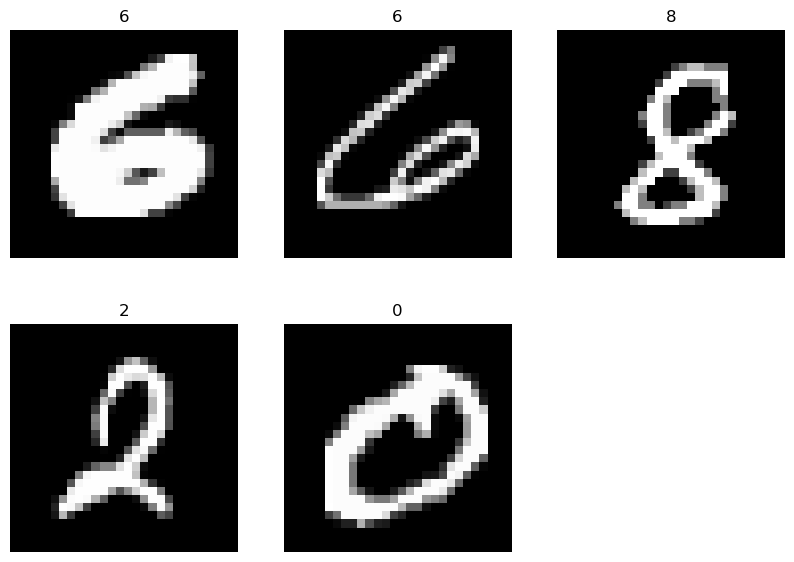

In [46]:
import matplotlib.pyplot as plt

torch.manual_seed(42)
plt.figure(figsize=(10,7))
for i, data_idx in enumerate(torch.randint(0,len(train_data), size=[5])):
    plt.subplot(2,3,i+1)
    plt.imshow(train_data.data[data_idx.item()], cmap='gray')
    plt.axis(False)
    plt.title(train_data.targets[data_idx.item()].item())

In [47]:
# len(train_data)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [48]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(batch_size=32, dataset=train_data, shuffle=True)
test_dataloader = DataLoader(batch_size=32, dataset=test_data, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [49]:
from torch import nn

In [50]:
class MNISTMODEL(nn.Module):
    """
    TinyVGG from CNN Explainer website
    """
    def __init__(self, 
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
            
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
            
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.linear_layer(x)

        return x

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = MNISTMODEL(input_shape=1,
                   hidden_units=10,
                   output_shape=len(classes)).to(device)
model

MNISTMODEL(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [52]:
random_img = torch.randn(size=(1,28,28))
random_img.shape

torch.Size([1, 28, 28])

In [211]:
# conv_1_output = model.conv_block_1(random_img)
# print(conv_1_output.shape)

# conv_2_output = model.conv_block_2(conv_1_output.unsqueeze(dim=1))
# conv_2_output.shape

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [54]:
# define loss and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.1
)

In [55]:
# import accuracy_fn
import sys
sys.path.append('..')

from helper_functions import accuracy_fn

In [59]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

model_start_time = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch}\n......')
    total_loss, total_acc = 0,0
    for batch, (X,y) in enumerate(train_dataloader):
        # train loop
        model.train()
    
        # forward pass
        y_logits = model(X)
        y_preds = torch.softmax(y_logits, dim=0).argmax(dim=1)
    
        # loss and optimizer
        loss = loss_fn(y_logits, y)
        acc = accuracy_fn(y_preds, y)
        total_loss += loss
        total_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    total_loss /= len(train_dataloader)
    total_acc/= len(train_dataloader)
    
    # test loop
    model.eval()
    with torch.inference_mode():
        total_test_loss, total_test_acc = 0,0
        for batch, (X_test,y_test) in enumerate(test_dataloader):
            test_logits = model(X_test)
            test_preds = torch.softmax(test_logits, dim=0).argmax(dim=1)
    
            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(test_preds, y_test)
            total_test_loss += test_loss
            total_test_acc += test_acc
        total_test_loss /= len(test_dataloader)
        total_test_acc /= len(test_dataloader)
    
    print(f'Training Loss: {total_loss:.5f} Acc: {total_acc:.4f} | Test Loss: {total_test_loss:.5f} Acc: {total_test_acc:.2f}')

model_end_time = timer()

model_total_training_time = model_end_time - model_start_time

print(f'\nTook {model_total_training_time:.3f} on {device}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
......
Training Loss: 0.05100 Acc: 87.7583 | Test Loss: 0.05025 Acc: 91.06
Epoch 1
......
Training Loss: 0.04730 Acc: 87.3233 | Test Loss: 0.05037 Acc: 90.84
Epoch 2
......
Training Loss: 0.04427 Acc: 87.9217 | Test Loss: 0.05412 Acc: 90.62
Epoch 3
......
Training Loss: 0.04308 Acc: 87.7033 | Test Loss: 0.05471 Acc: 91.03
Epoch 4
......
Training Loss: 0.04101 Acc: 87.8267 | Test Loss: 0.04625 Acc: 91.09
Took 48.539 on cpu


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [144]:
model.eval()
with torch.inference_mode():
    predictions = []
    total_test_loss, total_test_acc = 0,0
    for X,y in test_dataloader:
        y_logits = model(X)
        y_preds = torch.softmax(y_logits, dim=0).argmax(dim=1)

        loss = loss_fn(y_logits, y)
        acc = accuracy_fn(y_preds, y)
        total_test_loss += loss
        total_test_acc += acc
        
        predictions.append(y_preds)
        
    total_test_loss /= len(test_dataloader)
    total_test_acc /= len(test_dataloader)
    print(f'Test Loss: {total_test_loss:.5f} Acc: {total_test_acc:.2f}')
    

Test Loss: 0.04625 Acc: 91.09


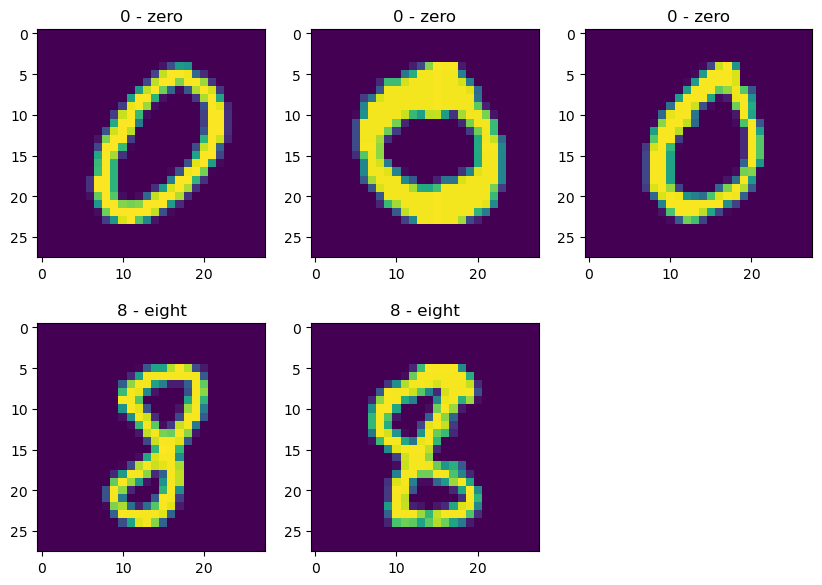

In [131]:
import random

torch.manual_seed(42)

# get 5 samples from the test data
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# random_5_images = torch.randint(0, len(test_dataloader), size=[5])

plt.figure(figsize=(10,7))
# for i, random_image_idx in enumerate(random_5_images):
for i in range(len(test_samples)):
    plt.subplot(2,3, i+1)
    # plt.imshow(test_data.data[random_image_idx])
    plt.imshow(test_samples[i].squeeze())

    title = f'{classes[test_labels[i]]}'
    plt.title(title)

In [132]:
test_samples[0].unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [133]:
(torch.unsqueeze(test_samples[0], dim=0)).shape

torch.Size([1, 1, 28, 28])

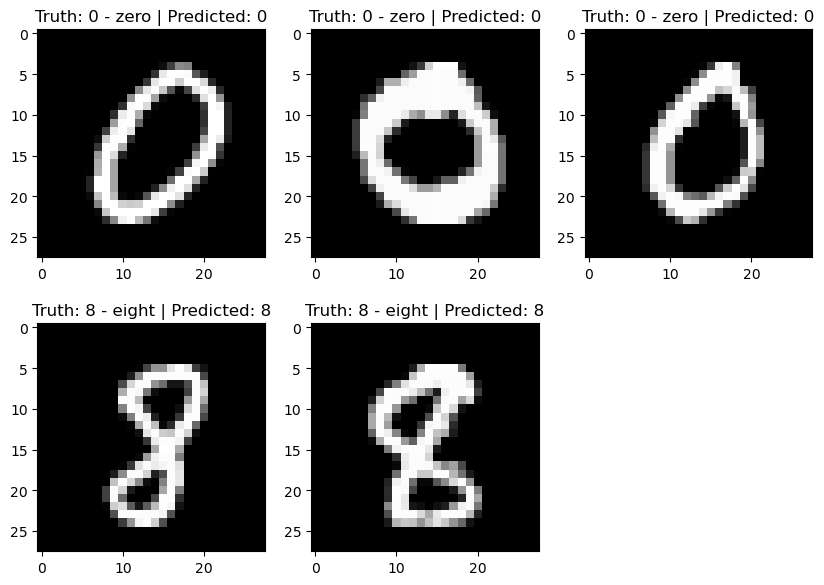

In [134]:
model.eval()
with torch.inference_mode():
    sample_preds = []
    for sample in test_samples:
        sample = torch.unsqueeze(sample, dim=0)
        test_logits = model(sample)
        sample_pred = torch.argmax(torch.softmax(test_logits.squeeze(), dim=0))
        sample_preds.append(sample_pred)
        
plt.figure(figsize=(10,7))
# for i, random_image_idx in enumerate(random_5_images):
for i in range(len(test_samples)):
    plt.subplot(2,3, i+1)
    # plt.imshow(test_data.data[random_image_idx])
    plt.imshow(test_samples[i].squeeze(), cmap='gray')

    title = f'Truth: {classes[test_labels[i]]} | Predicted: {sample_preds[i]}'
    plt.title(title)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [145]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

predictions = torch.cat(predictions) # convert list of predictions into one tensor
confusion_matrix = ConfusionMatrix(task='multiclass',
                           num_classes=len(classes))
conf_mat_tensor = confusion_matrix(preds=predictions,
                           target=test_data.targets)

conf_mat_tensor

tensor([[ 939,    4,    6,    1,    2,    4,   13,    0,    8,    3],
        [   0, 1122,    1,    0,    5,    0,    4,    0,    3,    0],
        [  13,  106,  846,   13,    5,    2,    4,   18,   24,    1],
        [   3,   11,    8,  901,    2,   42,    1,    9,   21,   12],
        [   1,   21,    1,    0,  919,    7,    6,    2,    7,   18],
        [   2,    5,    1,   22,    3,  789,   19,    2,   25,   24],
        [  11,   13,    0,    0,   11,   17,  889,    1,   15,    1],
        [   1,   69,   12,   11,   15,    3,    0,  870,    3,   44],
        [   5,    6,    3,    2,    9,    3,    7,    4,  926,    9],
        [   5,   11,    0,    6,   32,    5,    3,   16,   23,  908]])

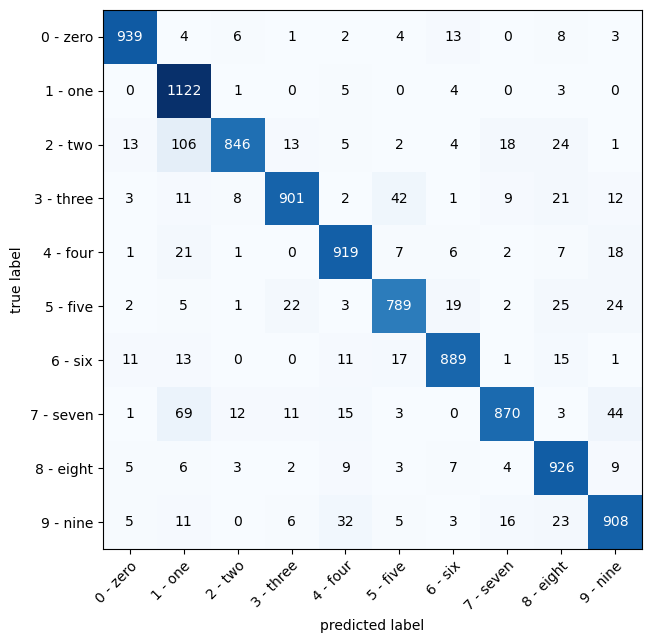

In [148]:
plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(),
                      class_names=classes,
                      figsize=(10,7)
                     );

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [154]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,3,64,64))
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [162]:
class MODEL1(nn.Module):
    def __init__(self, kernel_size:int, stride:int, padding:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=kernel_size,
                      stride=stride,
                      padding=padding),
        )
        
            
    def forward(self, x):
        x = self.conv_block_1(x)
        return x

In [164]:
model_1 = MODEL1(3,1,1)
model_1(random_tensor).shape

torch.Size([1, 10, 64, 64])

In [165]:
model_1 = MODEL1(2,1,1)
model_1(random_tensor).shape

torch.Size([1, 10, 65, 65])

In [168]:
model_1 = MODEL1(6,1,1)
model_1(random_tensor).shape

torch.Size([1, 10, 61, 61])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [205]:
train_data = torchvision.datasets.FashionMNIST(root='data',
                                              train = True,
                                              download=True,
                                              transform=torchvision.transforms.ToTensor(),
                                              target_transform=None)

test_data = torchvision.datasets.FashionMNIST(root='data',
                                              train = False,
                                              download=True,
                                              transform=torchvision.transforms.ToTensor(),
                                              target_transform=None)

In [206]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32,shuffle=False)

In [207]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [208]:
test_data.data[0].size()

torch.Size([28, 28])

In [209]:
model_2 = MNISTMODEL(input_shape=1,
                     hidden_units=10,
                     output_shape=len(classes))
model_2

MNISTMODEL(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [225]:
from tqdm.auto import tqdm
# training

torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    train_loss, train_acc = 0, 0
    
    model_2.train()
    #train loop
    for batch, (X,y) in enumerate(train_dataloader):

        y_logits = model_2(X)
        y_preds = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        loss = loss_fn(y_logits, y)
        acc = accuracy_fn(y_preds, y)
        train_loss += loss
        train_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # test loop
    model.eval()
    with torch.inference_mode():
        all_pred_labels = []
        test_loss, test_acc = 0,0
        for X_test, y_test in test_dataloader:
            # put X and y on target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # forward pass
            test_pred = model(X_test) # return logits

            # calculate loss and acc
            loss = loss_fn(test_pred, y_test)
            acc = accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim=1))
            test_loss += loss
            test_acc += acc
            all_pred_labels.append(test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        print(f'Training Loss: {loss:.5f}, Acc: {acc:.5f}| Testing Loss: {test_loss:.5f}, Acc: {test_acc:.5f}')


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Training Loss: 0.37603, Acc: 81.25000| Testing Loss: 0.37078, Acc: 86.85104
Epoch: 1
------
Training Loss: 0.37603, Acc: 81.25000| Testing Loss: 0.37078, Acc: 86.85104
Epoch: 2
------
Training Loss: 0.37603, Acc: 81.25000| Testing Loss: 0.37078, Acc: 86.85104


In [231]:
import numpy as np
# get wrong prediction images

wrong_predictions = np.where(torch.cat(all_pred_labels) != test_data.targets)[0]
wrong_predictions

array([   6,   12,   23, ..., 9985, 9989, 9991])

In [232]:
len(wrong_predictions)

1314

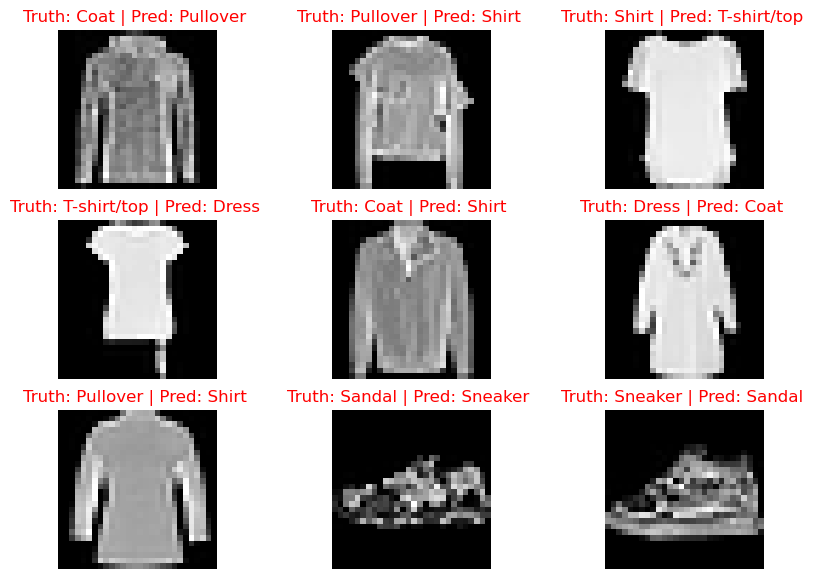

In [255]:
torch.manual_seed(42)

random_images = random.sample(list(wrong_predictions), k=9)

plt.figure(figsize=(10,7))
for i, r_img_idx in enumerate(random_images):
    plt.subplot(3,3, i+1)
    plt.axis(False)
    plt.imshow(test_data.data[r_img_idx], cmap='gray')

    title = f'Truth: {classes[(test_data.targets[r_img_idx]).item()]} | Pred: {classes[torch.cat(all_pred_labels)[r_img_idx]]} '
    
    plt.title(title, c='r')